In [200]:
#import the os library
import os

In [201]:
# setting the working directory
os.chdir("C:\\Users\\admin\\Downloads")

In [202]:
# checking the working directory
os.getcwd()

'C:\\Users\\admin\\Downloads'

In [203]:
# importing the few more required libraries
import pandas as pd
import matplotlib as mlt
import numpy as np
import datetime
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [204]:
# getting the data from the directory
df=pd.read_csv("train_cab.csv")
df_test=pd.read_csv("test.csv")

In [205]:
# name of the columns
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [206]:
# checking, how many observations(rows) and features(columns) are there
df.shape

(16067, 7)

In [207]:
# checking the data type as the whole dataset
type(df)

pandas.core.frame.DataFrame

In [208]:
# top 10 rows of the dataset
df.iloc[:10,]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [209]:
#Checking the datatpe of all the variables 
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [210]:
# converting the fare_amount variable to numeric 
df["fare_amount"]=pd.to_numeric(df["fare_amount"],errors="coerce")

In [211]:
# summary of all the variables
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [212]:
#lets see the distribution of unique values for fare_amount
df["passenger_count"].value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [213]:
df["fare_amount"].value_counts()

6.50      759
4.50      671
8.50      630
5.30      475
4.90      464
5.70      463
6.10      461
6.90      427
10.50     414
7.30      379
7.70      366
8.10      365
6.00      355
5.50      353
4.10      343
7.00      341
5.00      308
8.00      301
7.50      300
8.90      282
9.00      278
9.50      271
9.30      257
12.50     255
11.00     224
9.70      223
10.10     218
10.00     212
3.70      210
10.90     169
         ... 
28.25       1
59.50       1
26.30       1
95.00       1
15.40       1
69.70       1
453.00      1
165.00      1
47.04       1
31.07       1
25.20       1
36.04       1
70.00       1
33.29       1
26.80       1
55.83       1
54.61       1
180.00      1
31.60       1
108.00      1
39.00       1
46.00       1
34.27       1
35.07       1
75.33       1
42.67       1
54.30       1
29.40       1
37.87       1
52.33       1
Name: fare_amount, Length: 467, dtype: int64

In [214]:
# checking the data type of the variable pickup_datetime
type(df["pickup_datetime"])

pandas.core.series.Series

In [215]:
# counts of unique values in the variable(pickup_longitude)
df["pickup_longitude"].value_counts()

 0.000000     315
-73.137393     10
-73.985652      4
-73.981497      4
-73.991467      4
-73.989832      4
-73.967178      4
-73.975040      4
-73.981158      4
-73.952260      4
-73.994200      4
-73.977897      4
-73.988883      4
-73.986083      4
-73.988132      4
-73.995900      4
-73.991037      4
-73.991797      4
-73.982130      4
-73.976162      4
-73.995757      4
-73.978177      4
-73.982352      4
-73.971732      4
-74.004060      3
-73.982165      3
-73.983620      3
-74.006525      3
-73.991580      3
-73.990909      3
             ... 
-74.016055      1
-73.971217      1
-73.922409      1
-73.954823      1
-73.952912      1
-74.007398      1
-73.964585      1
-73.944576      1
-73.980164      1
-73.964589      1
-73.937673      1
-73.971018      1
-73.978265      1
-74.007287      1
-73.988604      1
-74.005567      1
-73.978075      1
-73.994883      1
-73.970632      1
-73.997040      1
-74.003448      1
-73.973533      1
-73.989357      1
-73.980720      1
-73.987404

In [216]:
#counts of unique values in the variable(pickup_latitude)
df["pickup_latitude"].value_counts()

0.000000     315
41.366138     10
40.759397      5
40.759922      4
40.747282      4
40.755815      4
40.761557      4
40.788582      4
40.748722      4
40.760160      4
40.753492      4
40.739887      4
40.765572      4
40.769132      3
40.750962      3
40.725552      3
40.769027      3
40.740610      3
40.734622      3
40.755762      3
40.724238      3
40.778642      3
40.760230      3
40.724965      3
40.761247      3
40.762443      3
40.740362      3
40.774047      3
40.737547      3
40.751015      3
            ... 
40.769053      1
40.738093      1
40.761458      1
40.740337      1
40.779925      1
40.747215      1
40.776642      1
40.738475      1
40.785452      1
40.753527      1
40.791088      1
40.680643      1
40.749525      1
40.762280      1
40.753892      1
40.769358      1
40.759247      1
40.756729      1
40.745852      1
40.749984      1
40.729600      1
40.766385      1
40.755331      1
40.739142      1
40.728562      1
40.768944      1
40.756810      1
40.808133     

In [217]:
# counts of unique values in the variable(pickup_longitude)
df["dropoff_longitude"].value_counts()

 0.000000     314
-73.137393      7
-73.982407      5
-73.992352      5
-73.976352      4
-73.982967      4
-73.976120      4
-74.000670      4
-73.982292      4
-73.982045      4
-73.983348      4
-73.991182      4
-73.981545      4
-73.980812      4
-73.988485      4
-74.002877      4
-73.991512      4
-73.980793      4
-73.992380      4
-73.991850      4
-73.973796      4
-73.971690      3
-73.979297      3
-73.979292      3
-73.982200      3
-73.988812      3
-73.983838      3
-73.977537      3
-73.982980      3
-73.986743      3
             ... 
-73.992743      1
-73.914269      1
-73.979295      1
-73.968014      1
-73.975197      1
-73.976068      1
-73.946434      1
-73.980092      1
-73.958065      1
-74.006267      1
-73.948907      1
-73.947015      1
-73.992198      1
-73.953800      1
-73.975822      1
-74.012050      1
-73.958107      1
-73.998580      1
-73.982637      1
-74.001088      1
-73.995969      1
-73.978448      1
-73.990446      1
-73.988210      1
-73.962491

In [218]:
df["dropoff_latitude"].value_counts()

0.000000     312
41.366138      7
40.773012      4
40.763325      4
40.752378      4
40.750038      4
40.758520      4
40.746792      4
40.739932      4
40.760270      4
40.764357      4
40.763892      4
40.763682      4
40.761185      4
40.752352      4
40.761235      4
40.777520      4
40.763422      4
40.758697      3
40.763175      3
40.763457      3
40.762305      3
40.748887      3
40.760442      3
40.729470      3
40.750072      3
40.759712      3
40.762877      3
40.755132      3
40.764125      3
            ... 
40.761823      1
40.757483      1
40.643965      1
40.751415      1
40.752753      1
40.734758      1
40.802415      1
40.764382      1
40.729426      1
40.766335      1
40.771554      1
40.742670      1
40.738475      1
40.751807      1
40.753355      1
40.756105      1
40.746473      1
40.805922      1
40.692358      1
40.851567      1
40.758408      1
40.717040      1
40.756277      1
40.768770      1
40.720037      1
40.734567      1
40.737617      1
40.761932     

In [219]:
# checking, is there any missing values in the dataset
mis_val=pd.DataFrame(df.isnull().sum())
mis_val

,0
fare_amount,25
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [220]:
# reset the index 
mis_val=mis_val.reset_index()
mis_val

,index,0
0,fare_amount,25
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [221]:
# rename the variables
mis_val= mis_val.rename(columns= {"index":"variables",0:"missing val %"})
mis_val

,variables,missing val %
0,fare_amount,25
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [222]:
# now calulating the % of missing values present in the data
mis_val["missing val %"]= (mis_val["missing val %"]/len(df))*100
mis_val

,variables,missing val %
0,fare_amount,0.155598
1,pickup_datetime,0.000000
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.342317


In [223]:
# checking the value at loc[1000]
df["pickup_latitude"].loc[1000]

40.759662

In [224]:
#actual value = 40.759662, at loc[1000]
# create missing value at loc[1000]
df["pickup_latitude"].loc[1000]= np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [225]:
# here the value is droped from this location
df["pickup_latitude"].loc[1000]

nan

In [226]:
# Now, we will try to impute the values by mean and median methods
df["pickup_latitude"]=df["pickup_latitude"].fillna(df["pickup_latitude"].mean())

In [227]:
# now we can see that at loc[1000] we get mean value of 39.91467290610686
df["pickup_latitude"].loc[1000]

39.91467290610686

In [228]:
# again creating missing value at loc[1000]
df["pickup_latitude"].loc[1000]= np.nan
df["pickup_latitude"].loc[1000]

nan

In [229]:
# this time filling the loc[1000] using medianass
df["pickup_latitude"]= df["pickup_latitude"].fillna(df["pickup_latitude"].median())
df["pickup_latitude"].loc[1000]         ## here also we get the value of the median = 40.7213

40.752603

In [230]:
# filling the missing values by using mean
df= df.fillna(df.median())
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [231]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [232]:
# filling up the original value of pickup latitude at loc[1000]
df["pickup_latitude"].loc[1000]= np.nan
df["pickup_latitude"].loc[1000]=40.759662
df["pickup_latitude"].loc[1000]

40.759662

In [233]:
# convert the datatype of pickup_latitude to float again
df["pickup_latitude"]=pd.to_numeric(df["pickup_latitude"],errors="coerce")

In [234]:
# checking the data type of pick up latitude now
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [237]:
#replacing the UTC from the pickup_datetime variable
df["pickup_datetime"]= df.pickup_datetime.str.replace("UTC","")
df_test["pickup_datetime"]=df_test.pickup_datetime.str.replace("UTC","")

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [238]:
# converting the pickup_datetime variable's data-type from object to datetime 
df["pickup_datetime"]= pd.to_datetime(df['pickup_datetime'],errors="coerce")
df_test["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"],errors="coerce")

In [239]:
# lets check the data-type of the whole dataframe
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [240]:
#adding few more columns in the dataset 
df["month"]=df.pickup_datetime.dt.month
df["day"]=df.pickup_datetime.dt.day
df["hours"]=df.pickup_datetime.dt.hour
#extracting some features to test date
df_test["month"]=df_test.pickup_datetime.dt.month
df_test["hours"]=df_test.pickup_datetime.dt.hour

In [241]:
# lets again take a look of no.of rows and columns
df.shape

(16067, 10)

In [242]:
# take a look of 1st few rows of the dataset 
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,hours
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,6.0,15.0,17.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,1.0,5.0,16.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,8.0,18.0,0.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,21.0,4.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,3.0,9.0,7.0


In [243]:
# dropping the "pickup_datetime"
df=df.drop(columns="pickup_datetime")
# dropping the "pickup_datetime" from test data also
df_test=df_test.drop(columns="pickup_datetime")

In [244]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hours
0,-73.973320,40.763805,-73.981430,40.743835,1,6.0,17.0
1,-73.986862,40.719383,-73.998886,40.739201,1,1.0,16.0
2,-73.982524,40.751260,-73.979654,40.746139,1,8.0,0.0
3,-73.981160,40.767807,-73.990448,40.751635,1,4.0,4.0
4,-73.966046,40.789775,-73.988565,40.744427,1,3.0,7.0


In [245]:
### OUTLIERS DETECTION ###
# checking the outliers
#firstly, coping the data
data=df.copy()

In [246]:
# now our dataset without "pickup_datetime" variable
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,hours
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,6.0,15.0,17.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,1.0,5.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,8.0,18.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,21.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,3.0,9.0,7.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


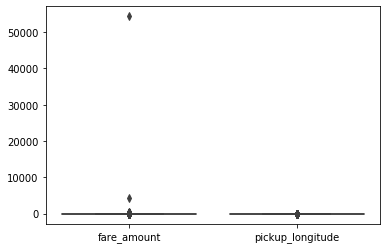

In [247]:
sns.boxplot(data=df.ix[:,:2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


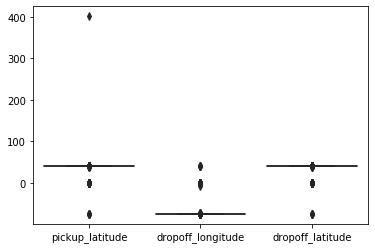

In [248]:
sns.boxplot(data=df.ix[:,2:5],color="green")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


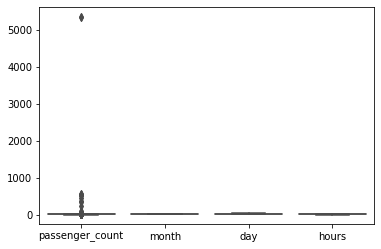

In [249]:
sns.boxplot(data=df.ix[:,5:],color="orange")

In [250]:
q75,q25=np.percentile(df.fare_amount,[75,25])
iqr = q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(max)
print(min)
df.loc[df["fare_amount"]>50,:"fare_amount"]=np.nan
df.loc[df["fare_amount"]<0,:"fare_amount"]=np.nan
print("go")

22.25
-3.75
go


In [251]:
q75,q25=np.percentile(df.pickup_latitude,[75,25])
iqr = q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(max)
print(min)
df.loc[df["pickup_latitude"]>max,:"pickup_latitude"]=np.nan
df.loc[df["pickup_latitude"]<min,:"pickup_latitude"]=np.nan
print("go")


40.816060949999994
40.686247429999995
go


In [252]:
q75,q25=np.percentile(df.dropoff_longitude,[75,25])
iqr = q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(max)
print(min)
df.loc[df["dropoff_longitude"]>max,:"dropoff_longitude"]=np.nan
df.loc[df["dropoff_longitude"]<min,:"dropoff_longitude"]=np.nan
print("go")

-73.92233325000002
-74.03249124999998
go


In [253]:
q75,q25=np.percentile(df.dropoff_latitude,[75,25])
iqr = q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(max)
print(min)
df.loc[df["dropoff_latitude"]>max,:"dropoff_latitude"]=np.nan
df.loc[df["dropoff_latitude"]<min,:"dropoff_latitude"]=np.nan
print("go")

40.81805724999999
40.684607250000006
go


In [254]:
q75,q25=np.percentile(df.passenger_count,[75,25])
iqr = q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(max)
print(min)
df.loc[df["passenger_count"]>6,:"passenger_count"]=np.nan
df.loc[df["passenger_count"]<0,:"passenger_count"]=np.nan
print("go")

3.5
-0.5
go


In [255]:
# checking the number of missing values which are created by outliers removal
mis_val=pd.DataFrame(df.isnull().sum())
mis_val


,0
fare_amount,1937
pickup_longitude,1909
pickup_latitude,1909
dropoff_longitude,1627
dropoff_latitude,1025
passenger_count,20
month,1
day,1
hours,1


In [256]:
# filling up the missing values by using median method
df= df.fillna(df.median())
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
month                0
day                  0
hours                0
dtype: int64

In [257]:
# FEATURE ENGINEERING 

In [258]:
# Adding the distance variable in the dataset
df["Distance"]=np.abs(df["pickup_latitude"]-df["dropoff_latitude"])+np.abs(df["pickup_longitude"]-df["dropoff_longitude"])
df_test["Distance"]=np.abs(df_test["pickup_latitude"]-df_test["dropoff_latitude"])+np.abs(df_test["pickup_longitude"]-df_test["dropoff_longitude"])

In [259]:
#saving the numeric variables name in a variable
cl_names=["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude",
          "passenger_count","month","day","hours","Distance"]

In [260]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,hours,Distance
0,8.0,-73.982377,40.753982,-73.981877,40.712278,1.0,6.0,15.0,17.0,0.042204
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,1.0,5.0,16.0,0.107481
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,8.0,18.0,0.0,0.019212
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,21.0,4.0,0.029386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,3.0,9.0,7.0,0.027194


In [ ]:
### Feature slection and feature scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011A95630>,
      dtype=object)

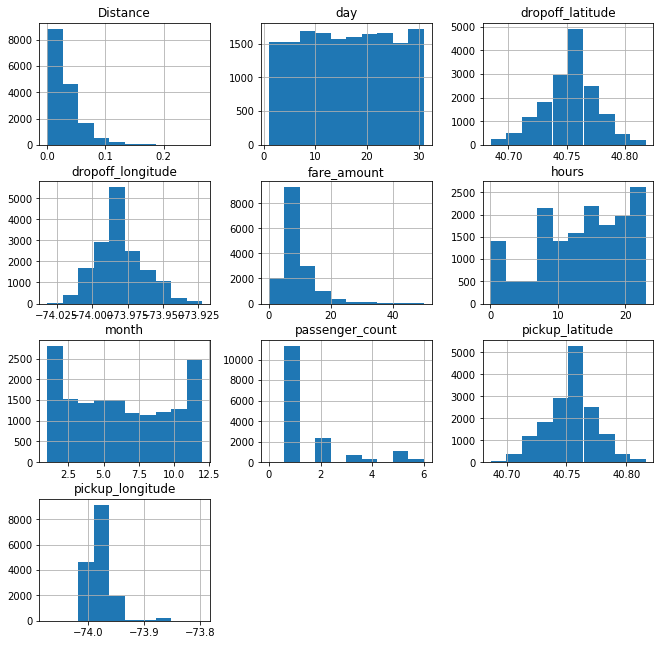

In [261]:
#lets see the histogram of all the features
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

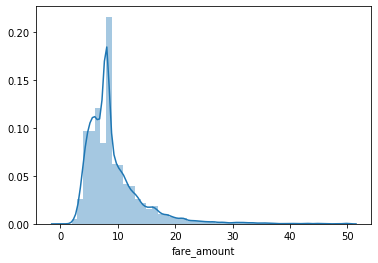

In [262]:
sns.distplot(df.fare_amount)

In [263]:
# taking the log of the month and the day, not hour because there are observations in hours column having value "0" and we can't use log for these values
# and can check using below function 
# df['hours'].min()
df["month"]=np.log10(df["month"])
df["day"]=np.log10(df["day"])

#taking log of month column in test data
df_test["month"]=np.log10(df_test["month"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000132E5518>,
      dtype=object)

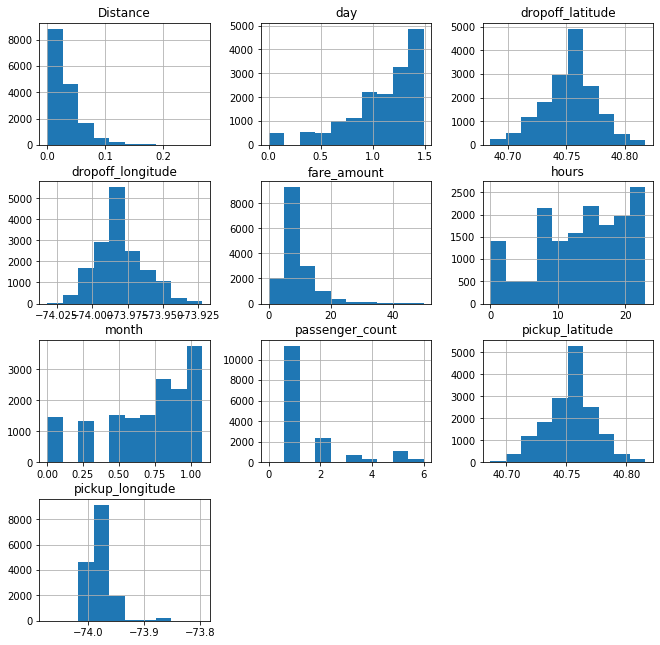

In [264]:
# again take a look of histogram,especially the month and day variable
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [265]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
month                float64
day                  float64
hours                float64
Distance             float64
dtype: object

In [266]:
# changing the position of the fare_amount variable
df=df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude",
       "passenger_count","month","day","hours","Distance","fare_amount"]]

In [267]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,hours,Distance,fare_amount
0,-73.982377,40.753982,-73.981877,40.712278,1.0,0.778151,1.176091,17.0,0.042204,8.0
1,-74.016048,40.711303,-73.979268,40.782004,1.0,0.000000,0.698970,16.0,0.107481,16.9
2,-73.982738,40.761270,-73.991242,40.750562,2.0,0.903090,1.255273,0.0,0.019212,5.7
3,-73.987130,40.733143,-73.991567,40.758092,1.0,0.602060,1.322219,4.0,0.029386,7.7
4,-73.968095,40.768008,-73.956655,40.783762,1.0,0.477121,0.954243,7.0,0.027194,5.3


In [268]:
# selecting the variable for doing data min-max normalisation 
c_names=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","hours"]
c_names_test=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","hours"]

In [269]:
# min-max normalisation
for i in c_names:
    print(i)
    df[i]=(df[i]-(df[i].min()))/((df[i].max())-(df[i].min()))
    


pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
hours


In [270]:
#min-max normalisation
for i in c_names_test:
    print(i)
    df_test[i]=(df_test[i]-(df_test[i].min()))/((df_test[i].max())-(df_test[i].min()))

pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
hours


In [271]:
# take a look of data again
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,hours,Distance,fare_amount
0,0.326374,0.521024,0.456641,0.207069,1.0,0.778151,1.176091,0.739130,0.042204,8.0
1,0.204885,0.191315,0.480471,0.730644,1.0,0.000000,0.698970,0.695652,0.107481,16.9
2,0.325070,0.577322,0.371125,0.494545,2.0,0.903090,1.255273,0.000000,0.019212,5.7
3,0.309223,0.360034,0.368157,0.551088,1.0,0.602060,1.322219,0.173913,0.029386,7.7
4,0.377903,0.629374,0.686973,0.743844,1.0,0.477121,0.954243,0.304348,0.027194,5.3


In [272]:
# correlation analysis
#corelation plot
df_cor = df.loc[:,cl_names]

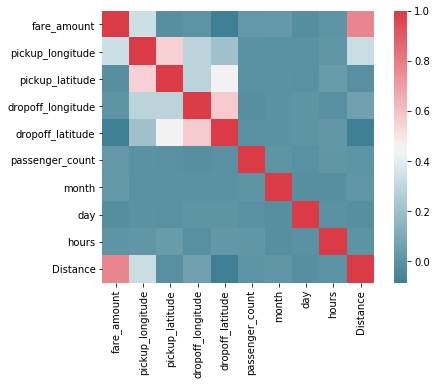

In [273]:
#set the dimensions of the plot
f,ax=plt.subplots(figsize=(7,5))
#generating correlation matrix
cor=df_cor.corr()
#plot usijng seaborn library
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [274]:
# droping the features
df=df.drop(["dropoff_latitude","pickup_latitude","day"],axis=1)

# also droping the features 
df_test=df_test.drop(["dropoff_latitude","pickup_latitude"],axis=1)

In [ ]:
### MODELING ####

In [275]:
# Firstly putting the values in x and y for training and test
x=df.values[:,:6]
y=df.values[:,6]
print(x)
print(y)

[[0.32637378 0.45664125 1.         0.77815125 0.73913043 0.04220355]
 [0.20488461 0.48047121 1.         0.         0.69565217 0.107481  ]
 [0.32506964 0.37112461 2.         0.90308999 0.         0.019212  ]
 ...
 [0.36198386 0.47764942 1.         1.04139269 0.47826087 0.019148  ]
 [0.41783689 0.45567782 1.         0.69897    1.         0.038571  ]
 [0.25517037 0.43838181 1.         1.07918125 0.26086957 0.050454  ]]
[ 8.  16.9  5.7 ...  8.5  8.1  8.5]


In [276]:
# splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [277]:
#train model using the training sets
model=sm.OLS(y_train,x_train).fit()


In [278]:
#summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          2.001e+04
Date:                Thu, 16 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:24:21   Log-Likelihood:                         -33603.
No. Observations:               12853   AIC:                                  6.722e+04
Df Residuals:                   12847   BIC:                                  6.726e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.9184      0.337     35.366      0.000      11.258      12.579
x2            -1.3114      0.191     -6.853      0.000      -1.687      -0.936
x3             0.1432      0.023      6.318      0.000       0.099       0.188
x4             0.9315      0.085     10.951      0.000       0.765       1.098
x5             0.7477      0.097      7.728      0.000       0.558       0.937
x6           141.4020      1.128    125.340      0.000     139.191     143.613
==============================================================================
Omnibus:                     8375.949   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389989.198
Skew:                           2.523   Prob(JB):                         0.00
Kurtosis:                      29.509   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
#prediction of the fare_amount variable in the test data
prediction_LR=model.predict(x_test)

# values of the fare amount of test data  predicted using Linear Regression
prediction_LR

array([ 6.08290071, 19.16312676,  7.73006542, ..., 14.12204304,
        9.40065558,  8.13633072])

In [281]:
# defining the root mean square function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [304]:
#root mean square value
rmse(y_test,prediction_LR)

3.1798969799673453

In [283]:
df_test.head()

,pickup_longitude,dropoff_longitude,passenger_count,month,hours,Distance
0,0.220338,0.221502,1,0.778151,0.739130,0.028080
1,0.209638,0.207781,1,0.000000,0.695652,0.031841
2,0.213066,0.222898,1,0.903090,0.000000,0.007991
3,0.214143,0.214414,1,0.602060,0.173913,0.025460
4,0.226085,0.215894,1,0.477121,0.304348,0.067867


In [284]:
# Now the values for real test data #
prediction_test=model.predict(df_test.iloc[:,:6])
# Predicted values of the test data
prediction_test

0        7.726899
1        7.391864
2        4.361515
3        6.705260
4       12.823223
5        9.062840
6        6.132397
7       50.205306
8       10.708712
9        5.740931
10       7.286734
11      13.698008
12       4.833231
13       6.793716
14       7.727751
15      13.795261
16       3.275089
17       9.057922
18       4.894916
19       4.928672
20       7.671853
21       7.175025
22       5.899504
23       7.345202
24      14.257070
25       5.942174
26      34.195819
27      21.719056
28       5.403058
29      12.914031
          ...    
9884    31.800592
9885    14.882020
9886    18.221735
9887     7.779978
9888     4.661586
9889     7.417771
9890    10.235789
9891    15.481061
9892     9.678707
9893    14.483738
9894     9.506821
9895    19.654311
9896     8.908662
9897    12.701104
9898     5.740498
9899    16.056447
9900     8.154185
9901     7.044686
9902    13.345391
9903     7.812112
9904    32.340073
9905    22.189036
9906     5.436760
9907    23.370344
9908     7

In [285]:
# Filling the fare_amount column by prediction_test data
df_test["fare_amount"]=prediction_test

In [286]:
df_test.head()

,pickup_longitude,dropoff_longitude,passenger_count,month,hours,Distance,fare_amount
0,0.220338,0.221502,1,0.778151,0.739130,0.028080,7.726899
1,0.209638,0.207781,1,0.000000,0.695652,0.031841,7.391864
2,0.213066,0.222898,1,0.903090,0.000000,0.007991,4.361515
3,0.214143,0.214414,1,0.602060,0.173913,0.025460,6.705260
4,0.226085,0.215894,1,0.477121,0.304348,0.067867,12.823223


In [287]:
#Decision Tree
#Divide data into test and train
train,test=train_test_split(df,test_size=0.2)

In [288]:
from sklearn.tree import DecisionTreeRegressor

In [289]:
#fitting the model in decision tree for regression
fit_model=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,:6],train.iloc[:,6])

In [290]:
#model prediction
prediction_DT=fit_model.predict(test.iloc[:,0:6])
prediction_DT

array([15.82296864,  6.78618879,  6.78618879, ..., 10.4704382 ,
       10.4704382 , 15.82296864])

In [291]:
# initially putting the fare_amount column of test dataset = 0
df_test["fare_amount"]=0
df_test.head()

,pickup_longitude,dropoff_longitude,passenger_count,month,hours,Distance,fare_amount
0,0.220338,0.221502,1,0.778151,0.739130,0.028080,0
1,0.209638,0.207781,1,0.000000,0.695652,0.031841,0
2,0.213066,0.222898,1,0.903090,0.000000,0.007991,0
3,0.214143,0.214414,1,0.602060,0.173913,0.025460,0
4,0.226085,0.215894,1,0.477121,0.304348,0.067867,0


In [292]:
# lets check the datatype of test dataset
df_test.dtypes

pickup_longitude     float64
dropoff_longitude    float64
passenger_count        int64
month                float64
hours                float64
Distance             float64
fare_amount            int64
dtype: object

In [293]:
# converting int to float datatype
df_test['passenger_count'] = pd.to_numeric(df_test['passenger_count'], downcast='float')
df_test["fare_amount"]=pd.to_numeric(df_test["fare_amount"],downcast="float")

In [297]:
df_test.isnull().sum()

pickup_longitude     0
dropoff_longitude    0
passenger_count      0
month                1
hours                1
Distance             0
fare_amount          0
dtype: int64

In [298]:
df_test= df_test.fillna(df_test.median())
df_test.isnull().sum()

pickup_longitude     0
dropoff_longitude    0
passenger_count      0
month                0
hours                0
Distance             0
fare_amount          0
dtype: int64

In [299]:
#prediction of fare amount values in test data set
prediction_test_DT=fit_model.predict(df_test.iloc[:,0:6])
prediction_test_DT

array([ 6.78618879, 10.4704382 ,  6.78618879, ..., 15.82296864,
       15.82296864,  6.78618879])

In [305]:
#root mean square error of train data
rmse(prediction_DT,test.iloc[:,6])

3.5201997511345517

In [301]:
# putting the values in the fare_amount column of test dataset
df_test["fare_amount"]=prediction_test_DT

In [302]:
#Lets now see first 5 rows of the dataset
df_test.head()

,pickup_longitude,dropoff_longitude,passenger_count,month,hours,Distance,fare_amount
0,0.220338,0.221502,1.0,0.778151,0.739130,0.028080,6.786189
1,0.209638,0.207781,1.0,0.000000,0.695652,0.031841,10.470438
2,0.213066,0.222898,1.0,0.903090,0.000000,0.007991,6.786189
3,0.214143,0.214414,1.0,0.602060,0.173913,0.025460,6.786189
4,0.226085,0.215894,1.0,0.477121,0.304348,0.067867,15.822969
